In [2]:
# Library imports with explanations:
import requests        # HTTP library - sends requests to websites (like clicking a link)
from bs4 import BeautifulSoup  # HTML parser - reads and navigates HTML code from websites
import pandas as pd    # Data analysis library - creates tables/spreadsheets for our data
import time           # Built-in Python library - lets us add delays between requests
from typing import List, Dict  # Type hints - helps specify what data types functions expect


In [3]:
base_url = "http://ufcstats.com"

events_url = f"{base_url}/statistics/events/completed"

our_headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}

response = requests.get(events_url,headers=our_headers)

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
event_rows = soup.find_all('tr', class_='b-statistics__table-row')[1:]

print(event_rows)

[<tr class="b-statistics__table-row">
<td class="b-statistics__table-col_type_clear"></td>
</tr>, <tr class="b-statistics__table-row">
<td class="b-statistics__table-col">
<i class="b-statistics__table-content">
<a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/f2c934689243fe4e">
                          UFC Fight Night: Taira vs. Park
                        </a>
<span class="b-statistics__date">
                          August 02, 2025
                        </span>
</i>
</td>
<td class="b-statistics__table-col b-statistics__table-col_style_big-top-padding">
                    Las Vegas, Nevada, USA
                  </td>
</tr>, <tr class="b-statistics__table-row">
<td class="b-statistics__table-col">
<i class="b-statistics__table-content">
<a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/28d8638ea0a71908">
                          UFC Fight Night: Whittaker vs. De Ridder
                        </a>
<span class="b-statisti

In [9]:
def print_events (events: List[Dict]):
        print("\n" + "="*60)
        print("RECENT UFC EVENTS:")
        print("="*60)
        
        # Pretty print each event
        for i, event in enumerate(events, 1):
            print(f"\nEvent {i}:")
            print(f"  Name: {event['name']}")
            print(f"  Date: {event['date']}")
            print(f"  Location: {event['location']}")
            print(f"  URL: {event['url']}")

In [10]:
events = []

for row in event_rows:
    cells = row.find_all('td', class_='b-statistics__table-col')

    if len(cells) >= 2:
        # Get the event name and URL from the first cell
        name_date_cell = cells[0]
        event_link = name_date_cell.find('a')
        event_date_tag = name_date_cell.find('span')

        if event_link and event_date_tag:
            # Extract event information
            event_name = event_link.text.strip()
            event_url = event_link.get('href')
            
            # Get location from second cell
            event_location = cells[1].text.strip() 

            # 
            event_date = event_date_tag.text.strip()
            
            # Create a dictionary with all the event info
            event_data = {
                'name': event_name,
                'date': event_date,
                'location': event_location,
                'url': event_url
            }
            
            # Add this event to our events list
            events.append(event_data)

            # Print progress
            print(f"Found event #{len(events)}: {event_name} on {event_date}")
            
print_events(events)

Found event #1: UFC Fight Night: Taira vs. Park on August 02, 2025
Found event #2: UFC Fight Night: Whittaker vs. De Ridder on July 26, 2025
Found event #3: UFC 318: Holloway vs. Poirier 3 on July 19, 2025
Found event #4: UFC Fight Night: Lewis vs. Teixeira on July 12, 2025
Found event #5: UFC 317: Topuria vs. Oliveira on June 28, 2025
Found event #6: UFC Fight Night: Hill vs. Rountree Jr. on June 21, 2025
Found event #7: UFC Fight Night: Usman vs. Buckley on June 14, 2025
Found event #8: UFC 316: Dvalishvili vs. O'Malley 2 on June 07, 2025
Found event #9: UFC Fight Night: Blanchfield vs. Barber on May 31, 2025
Found event #10: UFC Fight Night: Burns vs. Morales on May 17, 2025
Found event #11: UFC 315: Muhammad vs. Della Maddalena on May 10, 2025
Found event #12: UFC Fight Night: Sandhagen vs. Figueiredo on May 03, 2025
Found event #13: UFC Fight Night: Machado Garry vs. Prates on April 26, 2025
Found event #14: UFC 314: Volkanovski vs. Lopes on April 12, 2025
Found event #15: UFC Fig

In [13]:
from pprint import pprint

fights = []

for event in events:
    pprint(event)
    print("\n")

{'date': 'August 02, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'name': 'UFC Fight Night: Taira vs. Park',
 'url': 'http://ufcstats.com/event-details/f2c934689243fe4e'}


{'date': 'July 26, 2025',
 'location': 'Abu Dhabi, Abu Dhabi, United Arab Emirates',
 'name': 'UFC Fight Night: Whittaker vs. De Ridder',
 'url': 'http://ufcstats.com/event-details/28d8638ea0a71908'}


{'date': 'July 19, 2025',
 'location': 'New Orleans, Louisiana, USA',
 'name': 'UFC 318: Holloway vs. Poirier 3',
 'url': 'http://ufcstats.com/event-details/b8e2f10efb6eca85'}


{'date': 'July 12, 2025',
 'location': 'Nashville, Tennessee, USA',
 'name': 'UFC Fight Night: Lewis vs. Teixeira',
 'url': 'http://ufcstats.com/event-details/7b03d9df5910917d'}


{'date': 'June 28, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'name': 'UFC 317: Topuria vs. Oliveira',
 'url': 'http://ufcstats.com/event-details/66766984842c13dc'}


{'date': 'June 21, 2025',
 'location': 'Baku, Azerbaijan',
 'name': 'UFC Fight Night: Hill vs.

In [15]:
import matplotlib.pyplot as plt


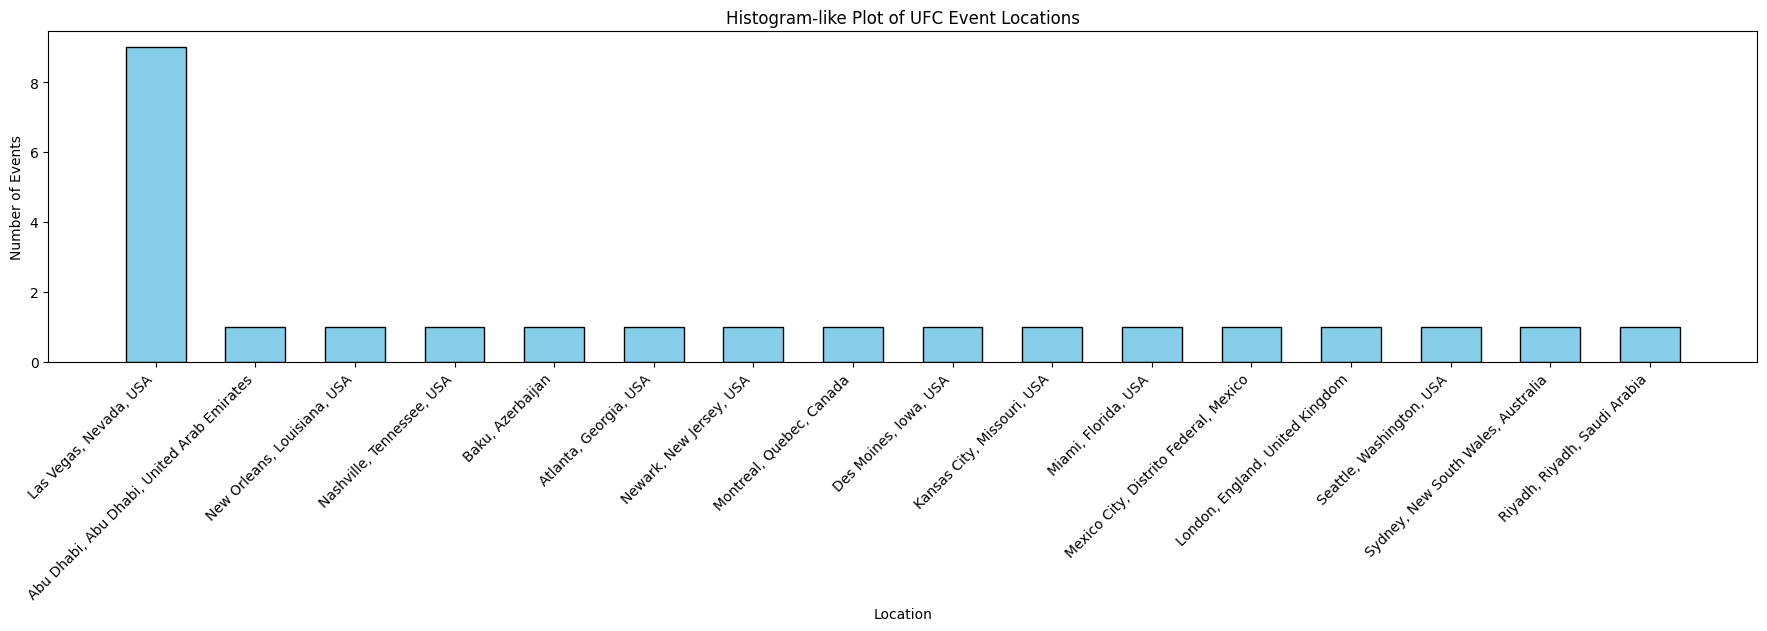

In [32]:
events_locations = []
event_urls = []

for event in events:
    event_urls.append(event["url"])
    events_locations.append(event["location"])

from collections import Counter

location_counts = Counter(events_locations)
locations = list(location_counts.keys())
counts = list(location_counts.values())

# Sort for better readability (optional)
locations, counts = zip(*sorted(zip(locations, counts), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(18, 6))
plt.bar(locations, counts, edgecolor='black', width=0.6, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Histogram-like Plot of UFC Event Locations")
plt.xlabel("Location")
plt.ylabel("Number of Events")
plt.show()


In [39]:
for i, url in enumerate(event_urls):
    response = requests.get(url,headers=our_headers)
    soup = BeautifulSoup(response.content, "html.parser")

    matchups = []

    matchup_tags = soup.find_all("td", {
        "class": "b-fight-details__table-col l-page_align_left",
        "style": "width:100px"
    })

    for matchup_tag in matchup_tags:
        fighters = matchup_tag.find_all("a", class_="b-link b-link_style_black")
        print(fighters)
        matchups.append(fighters[0].text.strip()+" vs "+ fighters[1].text.strip())
    
    events[i]["matchups"] = matchups

[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/4461d7e47375a895">
              Tatsuro Taira
            </a>, <a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/b671bdf981ad527d">
              HyunSung Park
            </a>]
[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/fd406a32a6fb3a29">
              Chris Duncan
            </a>, <a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/849c5d9979df5357">
              Mateusz Rebecki
            </a>]
[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/323d4ca260dfa0ba">
              Esteban Ribovics
            </a>, <a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/48a9a128784d53d1">
              Elves Brener
            </a>]
[<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/351c4ec637380ad5">
              Karol Rosa
      

In [40]:
for event in events:
    pprint(event)
    print("\n")

{'date': 'August 02, 2025',
 'location': 'Las Vegas, Nevada, USA',
 'matchups': ['Tatsuro Taira vs HyunSung Park',
              'Chris Duncan vs Mateusz Rebecki',
              'Esteban Ribovics vs Elves Brener',
              'Karol Rosa vs Nora Cornolle',
              'Neil Magny vs Elizeu Zaleski dos Santos',
              'Kevin Vallejos vs Danny Silva',
              'Rinya Nakamura vs Nathan Fletcher',
              'Rodolfo Vieira vs Tresean Gore',
              'Andrey Pulyaev vs Nick Klein',
              'Austin Bashi vs John Yannis',
              'Rafael Estevam vs Felipe Bunes',
              'Piera Rodriguez vs Ketlen Souza'],
 'name': 'UFC Fight Night: Taira vs. Park',
 'url': 'http://ufcstats.com/event-details/f2c934689243fe4e'}


{'date': 'July 26, 2025',
 'location': 'Abu Dhabi, Abu Dhabi, United Arab Emirates',
 'matchups': ['Reinier de Ridder vs Robert Whittaker',
              'Petr Yan vs Marcus McGhee',
              'Shara Magomedov vs Marc-Andre Barriault',
 